In [1]:
import os
from os.path import expanduser
home_dir = expanduser("~")
module_path = home_dir + '/code/modules/'
import sys
sys.path.append(module_path)
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 1
%aimport data_processing
from data_processing import *

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
galaxies, data_keys, unit_dict = load_galfile()
print(data_keys)

{'X_pos': 0, 'Y_pos': 1, 'Z_pos': 2, 'X_vel': 3, 'Y_vel': 4, 'Z_vel': 5, 'Halo_mass': 6, 'Stellar_mass': 7, 'SFR': 8, 'Intra_cluster_mass': 9, 'Halo_mass_peak': 10, 'Stellar_mass_obs': 11, 'SFR_obs': 12, 'Halo_radius': 13, 'Concentration': 14, 'Halo_spin': 15, 'Scale_peak_mass': 16, 'Scale_half_mass': 17, 'Scale_last_MajM': 18, 'Type': 19, 'Environmental_density': 20}


In [3]:
features_to_keep = ['Halo_mass', 'Halo_mass_peak', 
                    'Stellar_mass_obs', 'SFR_obs', 'Halo_radius', 'Concentration', 'Halo_spin', 'Scale_peak_mass',
                    'Scale_half_mass', 'Scale_last_MajM', 'Type', 'Environmental_density']
indeces_to_keep = []
for key in features_to_keep:
    indeces_to_keep.append(data_keys[key])
x = galaxies[:, indeces_to_keep]
x_means = np.mean(x, 0)
x_stds = np.std(x, 0)

x_norm = (x - x_means) / x_stds
n_data_points = np.shape(galaxies)[0]

In [4]:
print(np.isnan(x_norm).any())
print(np.isinf(x_norm).any())

False
False


<IPython.core.display.Javascript object>


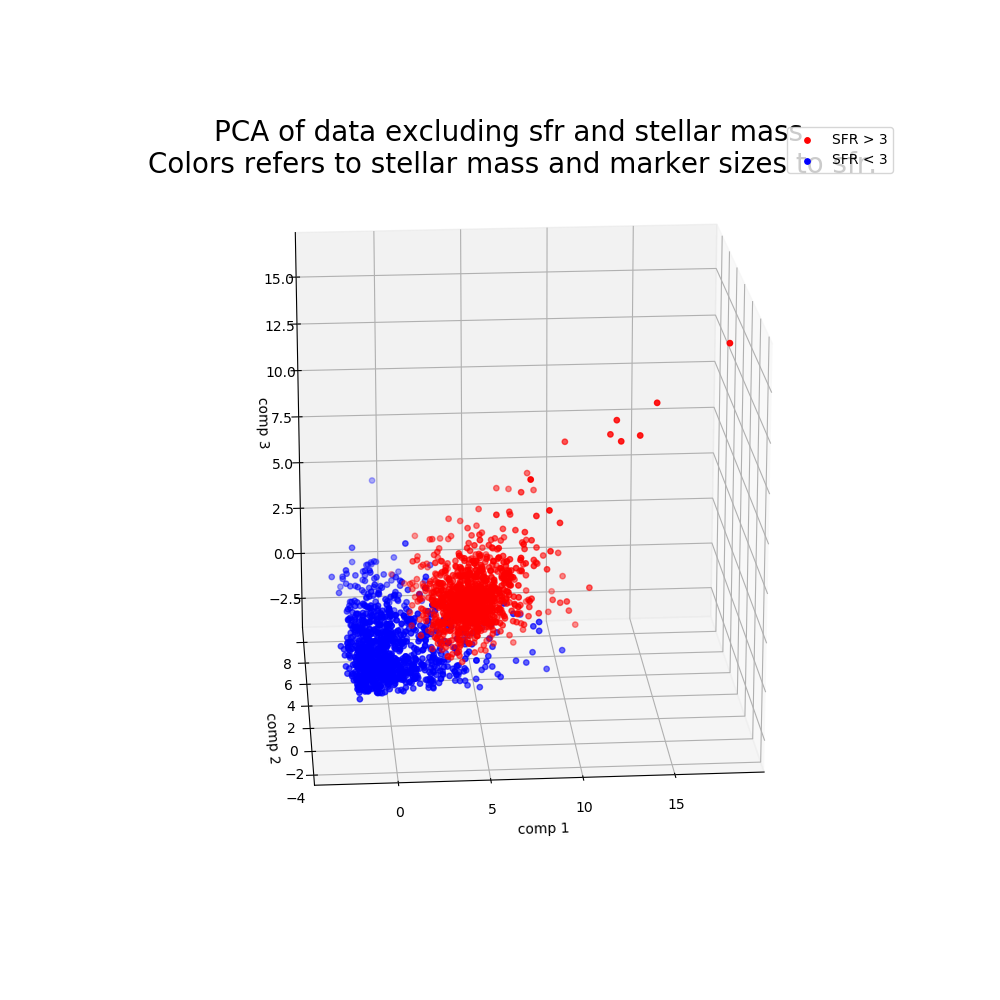

In [23]:
### PCA Plot, assign colors according to SFR
n_points_per_cat = 1000
sfr_cutoff = 3
marker_size = 15

large_sfr_inds = np.where(galaxies[:, data_keys['SFR']] > sfr_cutoff)
small_sfr_inds = np.where(galaxies[:, data_keys['SFR']] < sfr_cutoff)
large_sfr_inds_subset = np.random.choice(large_sfr_inds[0], n_points_per_cat, replace=False)
small_sfr_inds_subset = np.random.choice(small_sfr_inds[0], n_points_per_cat, replace=False)

#colors = np.asarray([3 if (galaxies[i,data_keys['SFR']] > 3) else 1 for i in range(n_data_points)])
#sizes = np.asarray([20 for i in range(n_data_points)])
#print(colors[:10])
#print(sizes[:10])

nr_components = 3
pca = PCA(n_components=nr_components)
pca.fit(x_norm)
x_red = pca.transform(x_norm)

%matplotlib notebook
%matplotlib notebook

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_red[large_sfr_inds_subset,0], x_red[large_sfr_inds_subset,1], 
           x_red[large_sfr_inds_subset,2], c='r', s=marker_size)
sc = ax.scatter(x_red[small_sfr_inds_subset,0], x_red[small_sfr_inds_subset,1], 
           x_red[small_sfr_inds_subset,2], c='b', s=marker_size)
#plt.colorbar(sc)
plt.legend(['SFR > %d' % (sfr_cutoff), 'SFR < %d' % (sfr_cutoff)])
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('PCA of data excluding sfr and stellar mass.\nColors refers to stellar mass and marker sizes to sfr.', 
          fontsize=20)
plt.show()

<IPython.core.display.Javascript object>


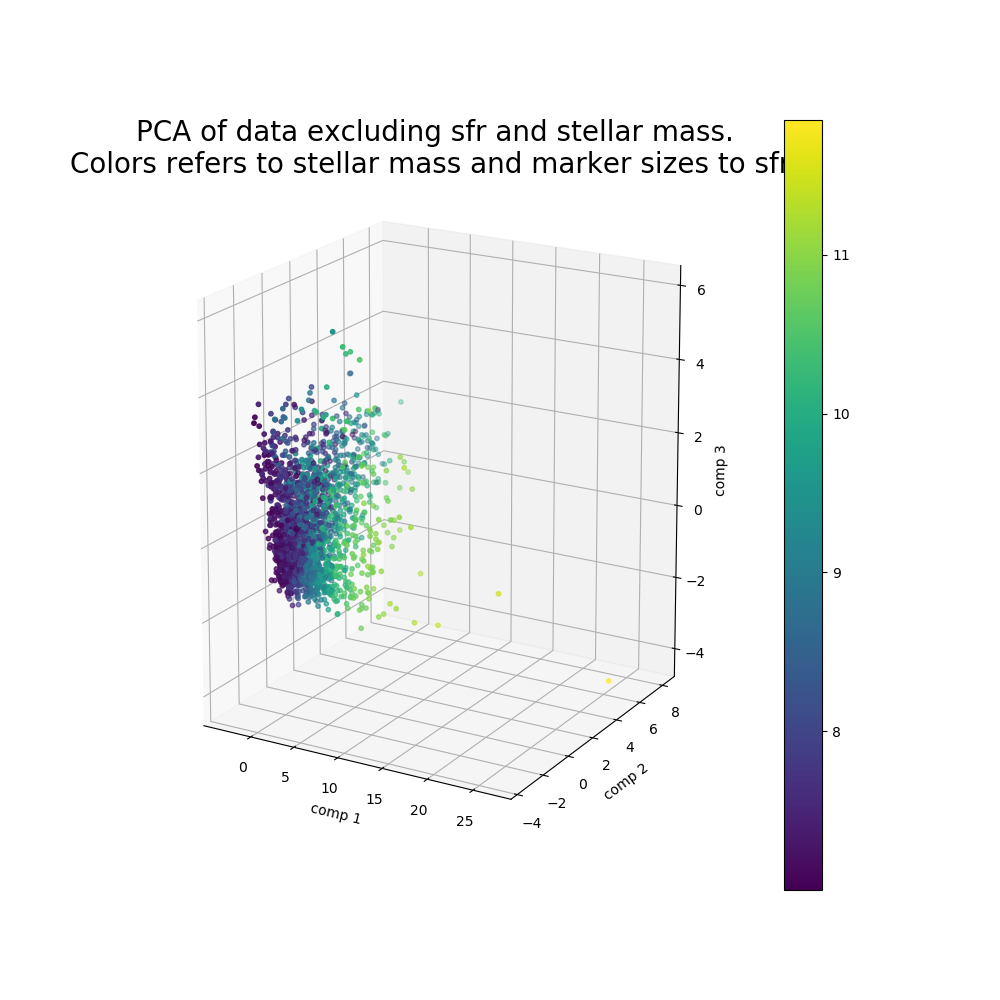

In [30]:
### PCA - Assign colors according to Stellar_mass and size according to SFR
max_size = 500
min_size = 5
n_points_to_show = 2000
colors = galaxies[:, data_keys['Stellar_mass']]
nr_components = 3
pca = PCA(n_components=nr_components)
pca.fit(x_norm)
x_red = pca.transform(x_norm)

%matplotlib notebook
%matplotlib notebook
subset_indices = np.random.choice(n_data_points, n_points_to_show, replace=False)
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_red[subset_indices,0], x_red[subset_indices,1], 
           x_red[subset_indices,2], c=colors[subset_indices], s=10)
plt.colorbar(sc)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('PCA of data excluding sfr and stellar mass.\nColors refers to stellar mass and marker sizes to sfr.', 
          fontsize=20)
plt.show()

In [ ]:
### SVD
u, sing_values, vh = np.linalg.svd(x_norm[:100, :])

%matplotlib inline
plt.plot(range(1,len(sing_values)+1), sing_values)

sing_val_sum = 0

for i in range(len(sing_values)):
    sing_val_sum += sing_values[i]
    if sing_val_sum > .9* np.sum(sing_values):
        print('90%% of the data is represented by the first %d singular values.\n' % (i+1) +
             'These account for %.0f%% of the dimensionality of the dataset.' % (100*(i+1)/len(sing_values)))
        break